## 01. Load datasets

In [6]:
# !pip install --upgrade moviepy
# !pip install --upgrade imageio[ffmpeg]
# !pip install ffmpeg

In [14]:
import pandas as pd
import os
from tqdm import tqdm
from moviepy import AudioFileClip
from moviepy import VideoFileClip
from tqdm import tqdm
import pandas as pd
import torch
import torchaudio
import torchaudio.transforms as T
import numpy as np

In [ ]:
train_csv_path = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_sent_emo.csv"
dev_csv_path = "/media/conite/NICO1/DATA_MELD/MELD.Raw/dev_sent_emo.csv"
test_csv_path = "/media/conite/NICO1/DATA_MELD/MELD.Raw/test_sent_emo.csv"

train_data = pd.read_csv(train_csv_path)
dev_data = pd.read_csv(dev_csv_path)
test_data = pd.read_csv(test_csv_path)

print("Train Data Sample:")
train_data.head()

Add filename column

In [16]:
import os

# Ensure the directory exists
output_dir = "../working/"
os.makedirs(output_dir, exist_ok=True)

train_data['filename'] = train_data.apply(lambda x : f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.wav", axis=1)
train_data.to_csv('../working/meld_train_data.csv', index=False)

test_data['filename'] = test_data.apply(lambda x : f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.wav", axis=1)
test_data.to_csv('../working/meld_test_data.csv', index=False)

dev_data['filename'] = dev_data.apply(lambda x : f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.wav", axis=1)
dev_data.to_csv('../working/meld_dev_data.csv', index=False)

NameError: name 'train_data' is not defined

## 02: Preprocess the Dataset

In [5]:
# !pip install moviepy

In [4]:
import os
import pandas as pd
from tqdm import tqdm
from moviepy import AudioFileClip

class DatasetProcessor:
    def __init__(self, csv_path, video_dir, output_dir):
        """
        Initialize the DatasetProcessor.

        Args:
            csv_path (str): Path to the CSV file containing the dataset.
            video_dir (str): Directory containing .mp4 video files.
            output_dir (str): Directory to save the extracted .wav files.
        """
        self.data = pd.read_csv(csv_path)
        self.video_dir = video_dir
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)

    def add_filename_column(self):
        self.data['filename'] = self.data.apply(
            lambda x: f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.wav", axis=1
        )
        print("Filename column added.")

    def add_mp4_directory_column(self):

        self.data['mp4_directory'] = self.data.apply(
            lambda x: os.path.join(self.video_dir, f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.mp4")
            if os.path.exists(os.path.join(self.video_dir, f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.mp4"))
            else None,
            axis=1
        )
        print("MP4 directory column added.")

    def extract_audio_to_wav(self):
        for _, row in tqdm(self.data.iterrows(), desc="Extracting audio to WAV", total=len(self.data)):
            if pd.isna(row['mp4_directory']):
                print(f"MP4 file missing for Dialogue_ID {row['Dialogue_ID']} Utterance_ID {row['Utterance_ID']}")
                continue

            mp4_path = row['mp4_directory']
            wav_path = os.path.join(self.output_dir, row['filename'])

            # Skip if the WAV file already exists
            if os.path.exists(wav_path):
                continue

            try:
                # Validate and process the video file
                with AudioFileClip(mp4_path) as video:
                    video.write_audiofile(wav_path, fps=16000)
                print(f"Extracted: {wav_path}")
            except Exception as e:
                print(f"Error extracting audio from {mp4_path}: {e}")
                log_error(mp4_path, str(e))


    def save_updated_csv(self, output_csv_path):

        self.data.to_csv(output_csv_path, index=False)
        print(f"Updated CSV saved to {output_csv_path}")

def log_error(file_path, error_message):
    with open("error_log.txt", "a") as log_file:
        log_file.write(f"File: {file_path}, Error: {error_message}\n")


train_csv_path = "../working/meld_train_data.csv"
dev_csv_path = "../working/meld_dev_data.csv"
test_csv_path = "../working/meld_test_data.csv"


In [15]:
# !pip uninstall moviepy -y
# !pip install moviepy imageio decorator

**2.1 Extract audio from videos**

In [5]:
# !pip install moviepy
# !pip show moviepy
from moviepy.audio.io.AudioFileClip import AudioFileClip
print("MoviePy installed successfully!")


MoviePy installed successfully!


In [ ]:
train_video_dir = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/"
train_output_dir = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/"

train_processor = DatasetProcessor(train_csv_path, train_video_dir, train_output_dir)
train_processor.add_filename_column()
train_processor.add_mp4_directory_column()
train_processor.extract_audio_to_wav()
train_processor.save_updated_csv("../working/meld_train_data_updated.csv")

In [ ]:

test_video_dir = "../MELD.Raw/output_repeated_splits_test/"
test_output_dir = "../MELD.Raw/output_repeated_splits_test/"

test_processor = DatasetProcessor(test_csv_path, test_video_dir, test_output_dir)
# test_processor.add_mp4_directory_column()
# test_processor.extract_audio_to_wav()
# test_processor.save_updated_csv("../working/meld_test_data_updated.csv")


In [ ]:

dev_video_dir = "../MELD.Raw/dev_splits/"
dev_output_dir = "../MELD.Raw/dev_splits/"

dev_processor = DatasetProcessor(dev_csv_path, dev_video_dir, dev_output_dir)
# dev_processor.add_mp4_directory_column()
# dev_processor.extract_audio_to_wav()
# dev_processor.save_updated_csv("../working/meld_dev_data_updated.csv")


Load updated dataset

In [6]:
train_csv_path = "../working/meld_train_data_updated.csv"
dev_csv_path = "../working/meld_dev_data_updated.csv"
test_csv_path = "../working/meld_test_data_updated.csv"

train_data = pd.read_csv(train_csv_path)
dev_data = pd.read_csv(dev_csv_path)
test_data = pd.read_csv(test_csv_path)
train_data.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,mp4_directory
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4.wav,/kaggle/input/meld-multimodal-emotionlines-dat...


In [9]:
train_data['mp4_directory'].tolist()

['/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt0.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt1.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt2.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt3.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt4.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt5.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt6.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt7.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/train/train_splits/dia0_utt8.mp4',
 '/kaggle/input/meld-multimodal-emotionlines-d

In [7]:
train_data['wav_directory'] = train_data.apply(
    lambda x: os.path.join("../MELD.Raw/train_splits/", x['filename']) 
    if os.path.exists(os.path.join("../MELD.Raw/train_splits/", x['filename']))
    else None,
    axis=1
)
test_data['wav_directory'] = test_data.apply(
    lambda x: os.path.join("../MELD.Raw/output_repeated_splits_test/", x['filename']) 
    if os.path.exists(os.path.join("../MELD.Raw/output_repeated_splits_test/", x['filename']))
    else None,
    axis=1
)
dev_data['wav_directory'] = dev_data.apply(
    lambda x: os.path.join("../MELD.Raw/dev_splits/", x['filename']) 
    if os.path.exists(os.path.join("../MELD.Raw/dev_splits/", x['filename']))
    else None,
    axis=1
)
train_data.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,mp4_directory,wav_directory
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0.wav,/kaggle/input/meld-multimodal-emotionlines-dat...,None
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1.wav,/kaggle/input/meld-multimodal-emotionlines-dat...,None
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2.wav,/kaggle/input/meld-multimodal-emotionlines-dat...,None
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3.wav,/kaggle/input/meld-multimodal-emotionlines-dat...,None
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4.wav,/kaggle/input/meld-multimodal-emotionlines-dat...,None


In [8]:
train_video_dir = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/"
train_output_dir = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/"
directory_audio_train = "../working/audios/train_wav_files/"
directory_audio_test = "../working/audios/test_wav_files/"
directory_audio_dev = "../working/audios/dev_wav_files/"

**CHange directory  of videos**

In [9]:
correct_video_dir = "/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/"

# Update the `mp4_directory` column in the DataFrame
train_data['mp4_directory'] = train_data.apply(
    lambda row: os.path.join(correct_video_dir, f"dia{row['Dialogue_ID']}_utt{row['Utterance_ID']}.mp4"), axis=1
)

# Verify the updated paths
print(train_data['mp4_directory'].tolist())


['/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt0.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt1.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt2.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt3.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt4.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt5.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt6.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt7.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt8.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt9.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt10.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt11.mp4', '/media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia0_utt12.mp4', '/media/conite/NICO1/

In [10]:
train_output_dir = "../working/audios/train_wav_files/"

train_data['wav_directory'] = train_data.apply(
    lambda row: os.path.join(train_output_dir, f"dia{row['Dialogue_ID']}_utt{row['Utterance_ID']}.wav"), axis=1
)

# Verify the updated audio paths
print(train_data['wav_directory'].tolist())


['../working/audios/train_wav_files/dia0_utt0.wav', '../working/audios/train_wav_files/dia0_utt1.wav', '../working/audios/train_wav_files/dia0_utt2.wav', '../working/audios/train_wav_files/dia0_utt3.wav', '../working/audios/train_wav_files/dia0_utt4.wav', '../working/audios/train_wav_files/dia0_utt5.wav', '../working/audios/train_wav_files/dia0_utt6.wav', '../working/audios/train_wav_files/dia0_utt7.wav', '../working/audios/train_wav_files/dia0_utt8.wav', '../working/audios/train_wav_files/dia0_utt9.wav', '../working/audios/train_wav_files/dia0_utt10.wav', '../working/audios/train_wav_files/dia0_utt11.wav', '../working/audios/train_wav_files/dia0_utt12.wav', '../working/audios/train_wav_files/dia0_utt13.wav', '../working/audios/train_wav_files/dia1_utt0.wav', '../working/audios/train_wav_files/dia1_utt1.wav', '../working/audios/train_wav_files/dia1_utt2.wav', '../working/audios/train_wav_files/dia1_utt3.wav', '../working/audios/train_wav_files/dia1_utt4.wav', '../working/audios/train_w

## 2.2 Embedding of Audio, Text and Video

In [13]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 6.1 MB/s eta 0:00:0000:0100:01m


In [11]:
import os
import torch
import pandas as pd
import torchvision.transforms as T
from transformers import Wav2Vec2Processor, Wav2Vec2Model, AutoTokenizer, AutoModel, ViTImageProcessor, ViTModel
from PIL import Image
from tqdm import tqdm
import torchaudio
import cv2

class MultiModalEmbedding:
    def __init__(self, 
                 audio_model_name="facebook/wav2vec2-base", 
                 text_model_name="bert-base-uncased", 
                 video_model_name="google/vit-base-patch16-224-in21k"):
        """
        Initialize MultiModalEmbedding with audio, text, and video models.
        """
        self.audio_processor = Wav2Vec2Processor.from_pretrained(audio_model_name)
        self.audio_model = Wav2Vec2Model.from_pretrained(audio_model_name).eval()

        self.text_tokenizer = AutoTokenizer.from_pretrained(text_model_name)
        self.text_model = AutoModel.from_pretrained(text_model_name).eval()

        self.video_processor = ViTImageProcessor.from_pretrained(video_model_name)
        self.video_model = ViTModel.from_pretrained(video_model_name).eval()

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.audio_model = self.audio_model.to(self.device)
        self.text_model = self.text_model.to(self.device)
        self.video_model = self.video_model.to(self.device)

    def extract_audio_embedding(self, audio_path, target_sample_rate=16000, max_duration=8.0):
            try:
                waveform, sample_rate = torchaudio.load(audio_path)
                if sample_rate != target_sample_rate:
                    resample = T.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
                    waveform = resample(waveform)

                if waveform.size(0) > 1:  # Stereo audio
                    waveform = torch.mean(waveform, dim=0, keepdim=True)


                max_length = int(target_sample_rate * max_duration)
                waveform = waveform[:, :max_length]
                if waveform.size(1) < max_length:
                    padding = max_length - waveform.size(1)
                    waveform = torch.nn.functional.pad(waveform, (0, padding))

                waveform = waveform.squeeze(0)


                inputs = self.audio_processor(waveform, sampling_rate=target_sample_rate, return_tensors='pt')
                inputs = {key: val.to(self.device) for key, val in inputs.items()}
                with torch.no_grad():
                    outputs = self.audio_model(**inputs)
                return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

            except Exception as e:
                print(f"Error processing audio: {e}")
                return None

    def extract_text_embedding(self, text, max_length=128):
        """
        Extract text embedding using a pretrained text model (e.g., BERT).
        """
        try:
            inputs = self.text_tokenizer(
                text, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt"
            )
            inputs = {key: val.to(self.device) for key, val in inputs.items()}

            with torch.no_grad():
                outputs = self.text_model(**inputs)
            return outputs.last_hidden_state[:, 0, :].squeeze(0).cpu().numpy()  # [CLS] token embedding
        except Exception as e:
            print(f"Error processing text: {text}, {e}")
            return None

    def extract_video_embedding(self, video_path, num_frames=16, frame_size=224):
        """
        Extract video embedding using ViT.
        """
        try:
            video = cv2.VideoCapture(video_path)
            frames = []
            frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
            frame_indices = torch.linspace(0, frame_count - 1, steps=num_frames).long().tolist()

            for idx in frame_indices:
                video.set(cv2.CAP_PROP_POS_FRAMES, idx)
                success, frame = video.read()
                if not success or frame is None:
                    continue
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(Image.fromarray(frame))
            video.release()

            if not frames:
                print(f"No valid frames extracted from {video_path}")
                return None

            inputs = self.video_processor(images=frames, return_tensors="pt")
            inputs = {key: val.to(self.device) for key, val in inputs.items()}

            with torch.no_grad():
                outputs = self.video_model(**inputs)
            return outputs.last_hidden_state.mean(dim=1).mean(dim=0).cpu().numpy()  # Mean pooling
        except Exception as e:
            print(f"Error processing video: {video_path}, {e}")
            return None

    def save_embeddings_to_dataframe(self, dataframe, audio_column, text_column, video_column, sentiment_column, emotion_column, output_path):
        """
        Extract embeddings for audio, text, and video, and save them to a DataFrame.
        """
        embeddings = []
        batch_size = 100

        for idx, row in tqdm(dataframe.iterrows(), desc="Extracting Embeddings", total=len(dataframe)):
            audio_embedding = self.extract_audio_embedding(row[audio_column]) if audio_column in row and not pd.isna(row[audio_column]) else None
            text_embedding = self.extract_text_embedding(row[text_column]) if text_column in row and not pd.isna(row[text_column]) else None
            video_embedding = self.extract_video_embedding(row[video_column]) if video_column in row and not pd.isna(row[video_column]) else None

            embeddings.append({
                "audio_embedding": audio_embedding,
                "text_embedding": text_embedding,
                "video_embedding": video_embedding,
                "sentiment": row[sentiment_column],
                "emotion": row[emotion_column]
            })

            if (idx + 1 ) % batch_size == 0:
                intermediate_output_path = f"{output_path.split('.csv')[0]}_batch_{(idx + 1) // batch_size}.csv"
                pd.DataFrame(embeddings).to_csv(intermediate_output_path, index=False)
                print(f"Saved {len(embeddings)} rows to {intermediate_output_path}")
                embeddings = []

        if embeddings:
            intermediate_output_path = f"{output_path.split('.csv')[0]}_final.csv"
            pd.DataFrame(embeddings).to_csv(intermediate_output_path, index=False)
            print(f"Saved remaining {len(embeddings)} rows to {intermediate_output_path}")

            
        print(f"All embeddings saved in batches to {output_path}")
        return pd.DataFrame(embeddings)


2025-01-06 19:18:38.540051: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 19:18:38.550874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736187518.562335 1927202 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736187518.565649 1927202 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 19:18:38.578786: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [12]:
audio_path = "../working/audios/train_wav_files/dia1038_utt17.wav"
print(f"Processing audio: {audio_path}")
waveform, sample_rate = torchaudio.load(audio_path)
print(f"Waveform shape: {waveform.shape}, Sample rate: {sample_rate}")


Processing audio: ../working/audios/train_wav_files/dia1038_utt17.wav
Waveform shape: torch.Size([2, 59040]), Sample rate: 16000


In [13]:
train_data

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,mp4_directory,wav_directory
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia0_utt0.wav
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia0_utt1.wav
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia0_utt2.wav
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia0_utt3.wav
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia0_utt4.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia1038_utt1...
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia1038_utt1...
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia1038_utt1...
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16.wav,/media/conite/NICO1/DATA_MELD/MELD.Raw/train/t...,../working/audios/train_wav_files/dia1038_utt1...


In [15]:
# !export CUDA_LAUNCH_BLOCKING=1
import torch

print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Number of GPUs: {torch.cuda.device_count()}")


CUDA Available: False
Number of GPUs: 1


In [16]:
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Version in PyTorch: {torch.version.cuda}")


PyTorch Version: 2.5.1+cu124
CUDA Version in PyTorch: 12.4


In [18]:

audio_column = "wav_directory"  
text_column = "Utterance"       
video_column = "mp4_directory"
sentiment_column = "Sentiment"  
emotion_column = "Emotion"      

# train----------------------------------------------------------------
output_path = "../working/train_embeddings.csv"
embedder = MultiModalEmbedding()
updated_train_data = embedder.save_embeddings_to_dataframe(
        train_data,
        audio_column=audio_column,
        text_column=text_column,
        video_column=video_column,
        sentiment_column=sentiment_column,
        emotion_column=emotion_column,
        output_path=output_path
)


/home/conite/.pyenv/versions/3.11.0/lib/python3.11/site-packages/transformers/configuration_utils.py:306: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Extracting Embeddings:   1%|          | 100/9989 [07:07<11:27:42,  4.17s/it]

Saved 100 rows to ../working/train_embeddings_batch_1.csv


Extracting Embeddings:   2%|▏         | 200/9989 [14:51<11:44:24,  4.32s/it]

Saved 100 rows to ../working/train_embeddings_batch_2.csv


Extracting Embeddings:   3%|▎         | 300/9989 [22:40<12:24:10,  4.61s/it]

Saved 100 rows to ../working/train_embeddings_batch_3.csv


Extracting Embeddings:   4%|▍         | 400/9989 [30:29<11:48:42,  4.43s/it]

Saved 100 rows to ../working/train_embeddings_batch_4.csv


Extracting Embeddings:   5%|▌         | 500/9989 [38:09<11:44:08,  4.45s/it]

Saved 100 rows to ../working/train_embeddings_batch_5.csv


Extracting Embeddings:   6%|▌         | 600/9989 [45:28<14:26:06,  5.53s/it]

Saved 100 rows to ../working/train_embeddings_batch_6.csv


Extracting Embeddings:   7%|▋         | 700/9989 [52:41<12:35:29,  4.88s/it]

Saved 100 rows to ../working/train_embeddings_batch_7.csv


Extracting Embeddings:   8%|▊         | 800/9989 [59:59<12:59:36,  5.09s/it]

Saved 100 rows to ../working/train_embeddings_batch_8.csv


Extracting Embeddings:   9%|▉         | 900/9989 [1:07:08<12:16:37,  4.86s/it]

Saved 100 rows to ../working/train_embeddings_batch_9.csv


Extracting Embeddings:  10%|█         | 1000/9989 [1:14:14<10:46:53,  4.32s/it]

Saved 100 rows to ../working/train_embeddings_batch_10.csv


Extracting Embeddings:  11%|█         | 1100/9989 [1:21:31<10:16:35,  4.16s/it]

Saved 100 rows to ../working/train_embeddings_batch_11.csv


Extracting Embeddings:  12%|█▏        | 1165/9989 [1:26:12<11:23:14,  4.65s/it]

Error processing audio: Error opening '../working/audios/train_wav_files/dia125_utt3.wav': System error.


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56104ef84480] moov atom not found
Extracting Embeddings:  12%|█▏        | 1166/9989 [1:26:12<8:09:02,  3.33s/it] 

No valid frames extracted from /media/conite/NICO1/DATA_MELD/MELD.Raw/train/train_splits/dia125_utt3.mp4


Extracting Embeddings:  12%|█▏        | 1200/9989 [1:28:32<11:38:16,  4.77s/it]

Saved 100 rows to ../working/train_embeddings_batch_12.csv


Extracting Embeddings:  13%|█▎        | 1300/9989 [1:35:39<11:51:04,  4.91s/it]

Saved 100 rows to ../working/train_embeddings_batch_13.csv


Extracting Embeddings:  14%|█▍        | 1400/9989 [1:42:46<10:04:21,  4.22s/it]

Saved 100 rows to ../working/train_embeddings_batch_14.csv


Extracting Embeddings:  15%|█▌        | 1500/9989 [1:49:53<10:00:22,  4.24s/it]

Saved 100 rows to ../working/train_embeddings_batch_15.csv


Extracting Embeddings:  16%|█▌        | 1600/9989 [1:57:08<10:00:41,  4.30s/it]

Saved 100 rows to ../working/train_embeddings_batch_16.csv


Extracting Embeddings:  17%|█▋        | 1700/9989 [2:04:08<10:28:50,  4.55s/it]

Saved 100 rows to ../working/train_embeddings_batch_17.csv


Extracting Embeddings:  18%|█▊        | 1800/9989 [2:11:20<9:32:39,  4.20s/it] 

Saved 100 rows to ../working/train_embeddings_batch_18.csv


Extracting Embeddings:  19%|█▉        | 1900/9989 [2:18:26<11:09:44,  4.97s/it]

Saved 100 rows to ../working/train_embeddings_batch_19.csv


Extracting Embeddings:  20%|██        | 2000/9989 [2:25:35<10:10:21,  4.58s/it]

Saved 100 rows to ../working/train_embeddings_batch_20.csv


Extracting Embeddings:  21%|██        | 2100/9989 [2:32:38<10:19:42,  4.71s/it]

Saved 100 rows to ../working/train_embeddings_batch_21.csv


Extracting Embeddings:  22%|██▏       | 2200/9989 [2:39:52<9:26:21,  4.36s/it] 

Saved 100 rows to ../working/train_embeddings_batch_22.csv


Extracting Embeddings:  23%|██▎       | 2300/9989 [2:46:58<9:17:37,  4.35s/it] 

Saved 100 rows to ../working/train_embeddings_batch_23.csv


Extracting Embeddings:  24%|██▍       | 2400/9989 [2:54:04<9:00:09,  4.27s/it] 

Saved 100 rows to ../working/train_embeddings_batch_24.csv


Extracting Embeddings:  25%|██▌       | 2500/9989 [3:01:11<8:52:31,  4.27s/it] 

Saved 100 rows to ../working/train_embeddings_batch_25.csv


Extracting Embeddings:  26%|██▌       | 2600/9989 [3:08:16<8:59:35,  4.38s/it] 

Saved 100 rows to ../working/train_embeddings_batch_26.csv


Extracting Embeddings:  27%|██▋       | 2700/9989 [3:15:27<8:47:58,  4.35s/it] 

Saved 100 rows to ../working/train_embeddings_batch_27.csv


Extracting Embeddings:  28%|██▊       | 2800/9989 [3:22:33<8:31:04,  4.27s/it] 

Saved 100 rows to ../working/train_embeddings_batch_28.csv


Extracting Embeddings:  29%|██▉       | 2900/9989 [3:29:42<8:04:11,  4.10s/it] 

Saved 100 rows to ../working/train_embeddings_batch_29.csv


Extracting Embeddings:  30%|███       | 3000/9989 [3:36:57<8:24:05,  4.33s/it] 

Saved 100 rows to ../working/train_embeddings_batch_30.csv


Extracting Embeddings:  31%|███       | 3100/9989 [3:44:03<7:57:40,  4.16s/it] 

Saved 100 rows to ../working/train_embeddings_batch_31.csv


Extracting Embeddings:  32%|███▏      | 3200/9989 [3:51:12<8:08:21,  4.32s/it] 

Saved 100 rows to ../working/train_embeddings_batch_32.csv


Extracting Embeddings:  33%|███▎      | 3300/9989 [3:58:26<9:06:11,  4.90s/it] 

Saved 100 rows to ../working/train_embeddings_batch_33.csv


Extracting Embeddings:  34%|███▍      | 3400/9989 [4:05:25<7:57:59,  4.35s/it]

Saved 100 rows to ../working/train_embeddings_batch_34.csv


Extracting Embeddings:  35%|███▌      | 3500/9989 [4:12:51<7:48:32,  4.33s/it] 

Saved 100 rows to ../working/train_embeddings_batch_35.csv


Extracting Embeddings:  36%|███▌      | 3600/9989 [4:21:22<10:41:49,  6.03s/it]

Saved 100 rows to ../working/train_embeddings_batch_36.csv


Extracting Embeddings:  37%|███▋      | 3700/9989 [4:29:37<8:16:42,  4.74s/it] 

Saved 100 rows to ../working/train_embeddings_batch_37.csv


Extracting Embeddings:  38%|███▊      | 3800/9989 [4:37:18<7:56:01,  4.61s/it] 

Saved 100 rows to ../working/train_embeddings_batch_38.csv


Extracting Embeddings:  39%|███▉      | 3900/9989 [4:45:08<8:10:17,  4.83s/it] 

Saved 100 rows to ../working/train_embeddings_batch_39.csv


Extracting Embeddings:  40%|████      | 4000/9989 [4:53:01<8:06:07,  4.87s/it] 

Saved 100 rows to ../working/train_embeddings_batch_40.csv


Extracting Embeddings:  41%|████      | 4100/9989 [5:01:02<7:32:10,  4.61s/it] 

Saved 100 rows to ../working/train_embeddings_batch_41.csv


Extracting Embeddings:  42%|████▏     | 4200/9989 [5:08:54<7:58:01,  4.95s/it] 

Saved 100 rows to ../working/train_embeddings_batch_42.csv


Extracting Embeddings:  43%|████▎     | 4300/9989 [5:17:11<8:09:08,  5.16s/it] 

Saved 100 rows to ../working/train_embeddings_batch_43.csv


Extracting Embeddings:  44%|████▍     | 4400/9989 [5:25:40<10:38:07,  6.85s/it]

Saved 100 rows to ../working/train_embeddings_batch_44.csv


Extracting Embeddings:  45%|████▌     | 4500/9989 [5:33:39<9:24:18,  6.17s/it] 

Saved 100 rows to ../working/train_embeddings_batch_45.csv


Extracting Embeddings:  46%|████▌     | 4600/9989 [5:41:15<7:35:09,  5.07s/it] 

Saved 100 rows to ../working/train_embeddings_batch_46.csv


Extracting Embeddings:  47%|████▋     | 4700/9989 [5:49:05<7:12:24,  4.91s/it] 

Saved 100 rows to ../working/train_embeddings_batch_47.csv


Extracting Embeddings:  48%|████▊     | 4800/9989 [5:56:57<7:11:11,  4.99s/it] 

Saved 100 rows to ../working/train_embeddings_batch_48.csv


Extracting Embeddings:  49%|████▉     | 4900/9989 [6:04:48<7:38:04,  5.40s/it] 

Saved 100 rows to ../working/train_embeddings_batch_49.csv


Extracting Embeddings:  50%|█████     | 5000/9989 [6:12:29<6:43:31,  4.85s/it]

Saved 100 rows to ../working/train_embeddings_batch_50.csv


Extracting Embeddings:  51%|█████     | 5100/9989 [6:20:22<6:45:42,  4.98s/it] 

Saved 100 rows to ../working/train_embeddings_batch_51.csv


Extracting Embeddings:  52%|█████▏    | 5200/9989 [6:28:17<5:27:05,  4.10s/it]

Saved 100 rows to ../working/train_embeddings_batch_52.csv


Extracting Embeddings:  53%|█████▎    | 5300/9989 [6:36:10<5:31:34,  4.24s/it]

Saved 100 rows to ../working/train_embeddings_batch_53.csv


Extracting Embeddings:  54%|█████▍    | 5400/9989 [6:43:53<5:21:51,  4.21s/it]

Saved 100 rows to ../working/train_embeddings_batch_54.csv


Extracting Embeddings:  55%|█████▌    | 5500/9989 [6:51:38<5:09:52,  4.14s/it]

Saved 100 rows to ../working/train_embeddings_batch_55.csv


Extracting Embeddings:  56%|█████▌    | 5600/9989 [6:59:23<7:12:10,  5.91s/it]

Saved 100 rows to ../working/train_embeddings_batch_56.csv


Extracting Embeddings:  57%|█████▋    | 5700/9989 [7:07:09<5:25:13,  4.55s/it]

Saved 100 rows to ../working/train_embeddings_batch_57.csv


Extracting Embeddings:  58%|█████▊    | 5800/9989 [7:14:46<7:20:30,  6.31s/it]

Saved 100 rows to ../working/train_embeddings_batch_58.csv


Extracting Embeddings:  59%|█████▉    | 5900/9989 [7:22:43<5:11:32,  4.57s/it]

Saved 100 rows to ../working/train_embeddings_batch_59.csv


Extracting Embeddings:  60%|██████    | 6000/9989 [7:30:31<8:10:28,  7.38s/it]

Saved 100 rows to ../working/train_embeddings_batch_60.csv


Extracting Embeddings:  61%|██████    | 6100/9989 [7:38:16<4:57:23,  4.59s/it]

Saved 100 rows to ../working/train_embeddings_batch_61.csv


Extracting Embeddings:  62%|██████▏   | 6200/9989 [7:45:58<4:19:37,  4.11s/it]

Saved 100 rows to ../working/train_embeddings_batch_62.csv


Extracting Embeddings:  63%|██████▎   | 6300/9989 [7:53:53<4:29:29,  4.38s/it]

Saved 100 rows to ../working/train_embeddings_batch_63.csv


Extracting Embeddings:  64%|██████▍   | 6400/9989 [8:01:39<6:47:09,  6.81s/it]

Saved 100 rows to ../working/train_embeddings_batch_64.csv


Extracting Embeddings:  65%|██████▌   | 6500/9989 [8:09:32<6:01:04,  6.21s/it]

Saved 100 rows to ../working/train_embeddings_batch_65.csv


Extracting Embeddings:  66%|██████▌   | 6600/9989 [8:17:12<4:06:10,  4.36s/it]

Saved 100 rows to ../working/train_embeddings_batch_66.csv


Extracting Embeddings:  67%|██████▋   | 6700/9989 [8:24:44<3:44:04,  4.09s/it]

Saved 100 rows to ../working/train_embeddings_batch_67.csv


Extracting Embeddings:  68%|██████▊   | 6800/9989 [8:32:29<4:10:29,  4.71s/it]

Saved 100 rows to ../working/train_embeddings_batch_68.csv


Extracting Embeddings:  69%|██████▉   | 6900/9989 [8:40:11<4:13:37,  4.93s/it]

Saved 100 rows to ../working/train_embeddings_batch_69.csv


Extracting Embeddings:  70%|███████   | 7000/9989 [8:47:58<3:47:02,  4.56s/it]

Saved 100 rows to ../working/train_embeddings_batch_70.csv


Extracting Embeddings:  71%|███████   | 7100/9989 [8:55:39<3:32:55,  4.42s/it]

Saved 100 rows to ../working/train_embeddings_batch_71.csv


Extracting Embeddings:  72%|███████▏  | 7200/9989 [9:03:24<3:31:32,  4.55s/it]

Saved 100 rows to ../working/train_embeddings_batch_72.csv


Extracting Embeddings:  73%|███████▎  | 7300/9989 [9:11:02<3:09:17,  4.22s/it]

Saved 100 rows to ../working/train_embeddings_batch_73.csv


Extracting Embeddings:  74%|███████▍  | 7400/9989 [9:18:48<3:06:35,  4.32s/it]

Saved 100 rows to ../working/train_embeddings_batch_74.csv


Extracting Embeddings:  75%|███████▌  | 7500/9989 [9:26:33<3:03:10,  4.42s/it]

Saved 100 rows to ../working/train_embeddings_batch_75.csv


Extracting Embeddings:  76%|███████▌  | 7600/9989 [9:33:55<3:06:05,  4.67s/it]

Saved 100 rows to ../working/train_embeddings_batch_76.csv


Extracting Embeddings:  77%|███████▋  | 7700/9989 [9:41:37<2:51:16,  4.49s/it]

Saved 100 rows to ../working/train_embeddings_batch_77.csv


Extracting Embeddings:  78%|███████▊  | 7800/9989 [9:49:17<2:44:41,  4.51s/it]

Saved 100 rows to ../working/train_embeddings_batch_78.csv


Extracting Embeddings:  79%|███████▉  | 7900/9989 [9:57:02<2:51:15,  4.92s/it]

Saved 100 rows to ../working/train_embeddings_batch_79.csv


Extracting Embeddings:  80%|████████  | 8000/9989 [10:04:35<2:27:29,  4.45s/it]

Saved 100 rows to ../working/train_embeddings_batch_80.csv


Extracting Embeddings:  81%|████████  | 8100/9989 [10:12:21<2:12:11,  4.20s/it]

Saved 100 rows to ../working/train_embeddings_batch_81.csv


Extracting Embeddings:  82%|████████▏ | 8200/9989 [10:19:51<2:33:29,  5.15s/it]

Saved 100 rows to ../working/train_embeddings_batch_82.csv


Extracting Embeddings:  83%|████████▎ | 8300/9989 [10:27:31<2:06:19,  4.49s/it]

Saved 100 rows to ../working/train_embeddings_batch_83.csv


Extracting Embeddings:  84%|████████▍ | 8400/9989 [10:35:11<2:04:20,  4.69s/it]

Saved 100 rows to ../working/train_embeddings_batch_84.csv


Extracting Embeddings:  85%|████████▌ | 8500/9989 [10:42:50<1:45:57,  4.27s/it]

Saved 100 rows to ../working/train_embeddings_batch_85.csv


Extracting Embeddings:  86%|████████▌ | 8600/9989 [10:50:28<1:44:23,  4.51s/it]

Saved 100 rows to ../working/train_embeddings_batch_86.csv


Extracting Embeddings:  87%|████████▋ | 8700/9989 [11:00:22<1:44:23,  4.86s/it]

Saved 100 rows to ../working/train_embeddings_batch_87.csv


Extracting Embeddings:  88%|████████▊ | 8800/9989 [11:08:03<2:02:31,  6.18s/it]

Saved 100 rows to ../working/train_embeddings_batch_88.csv


Extracting Embeddings:  89%|████████▉ | 8900/9989 [11:15:29<1:23:31,  4.60s/it]

Saved 100 rows to ../working/train_embeddings_batch_89.csv


Extracting Embeddings:  90%|█████████ | 9000/9989 [11:23:07<1:12:30,  4.40s/it]

Saved 100 rows to ../working/train_embeddings_batch_90.csv


Extracting Embeddings:  91%|█████████ | 9100/9989 [11:30:45<1:03:09,  4.26s/it]

Saved 100 rows to ../working/train_embeddings_batch_91.csv


Extracting Embeddings:  92%|█████████▏| 9200/9989 [11:38:26<56:26,  4.29s/it]  

Saved 100 rows to ../working/train_embeddings_batch_92.csv


Extracting Embeddings:  93%|█████████▎| 9300/9989 [11:45:45<56:51,  4.95s/it]  

Saved 100 rows to ../working/train_embeddings_batch_93.csv


Extracting Embeddings:  94%|█████████▍| 9400/9989 [11:53:24<42:16,  4.31s/it]  

Saved 100 rows to ../working/train_embeddings_batch_94.csv


Extracting Embeddings:  95%|█████████▌| 9500/9989 [12:01:26<39:58,  4.90s/it]  

Saved 100 rows to ../working/train_embeddings_batch_95.csv


Extracting Embeddings:  96%|█████████▌| 9600/9989 [12:09:09<29:15,  4.51s/it]

Saved 100 rows to ../working/train_embeddings_batch_96.csv


Extracting Embeddings:  97%|█████████▋| 9700/9989 [12:17:16<29:58,  6.22s/it]

Saved 100 rows to ../working/train_embeddings_batch_97.csv


Extracting Embeddings:  98%|█████████▊| 9800/9989 [12:24:52<15:14,  4.84s/it]

Saved 100 rows to ../working/train_embeddings_batch_98.csv


Extracting Embeddings:  99%|█████████▉| 9900/9989 [12:32:36<07:26,  5.01s/it]

Saved 100 rows to ../working/train_embeddings_batch_99.csv


Extracting Embeddings: 100%|██████████| 9989/9989 [12:39:35<00:00,  4.56s/it]


Saved remaining 89 rows to ../working/train_embeddings_final.csv
All embeddings saved in batches to ../working/train_embeddings.csv


In [ ]:

# dev----------------------------------------------------------------
output_path = "../working/dev_embeddings.csv"
embedder = MultiModalEmbedding()
updated_dev_data = embedder.save_embeddings_to_dataframe(
        dev_data,
        audio_column=audio_column,
        text_column=text_column,
        video_column=video_column,
        sentiment_column=sentiment_column,
        emotion_column=emotion_column,
        output_path=output_path
)

# # test----------------------------------------------------------------
output_path = "../working/test_embeddings.csv"
embedder = MultiModalEmbedding()
updated_test_data = embedder.save_embeddings_to_dataframe(
        test_data,
        audio_column=audio_column,
        text_column=text_column,
        video_column=video_column,
        sentiment_column=sentiment_column,
        emotion_column=emotion_column,
        output_path=output_path
)

In [3]:
import pandas as pd

text_embeddings = pd.read_csv('../working/train_embeddings.csv')['text_embedding']
audio_embeddings = pd.read_csv('../working/train_embeddings.csv')['audio_embedding']
video_embeddings = pd.read_csv('../working/train_video_embeddings_vit.csv')['embedding']

In [4]:
audio_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.093914,0.076241,0.068882,0.181334,0.328460,-0.290516,0.233741,-0.265551,0.064729,-0.087522,...,-0.207746,0.136935,0.004562,0.079207,-0.540750,0.015910,-0.194369,0.246880,0.343913,-0.368910
1,-0.028174,0.072124,0.438519,0.021849,-0.276202,-0.121273,0.198343,-0.073642,-0.004926,-0.095020,...,0.398234,0.182521,-0.161446,-0.039307,-0.226637,-0.205345,0.035520,0.435332,0.099466,-0.029616
2,-0.072145,0.115909,0.176923,-0.007852,-0.175530,-0.121004,0.140612,-0.034857,0.002250,-0.140909,...,0.122414,0.152680,-0.233528,0.025625,-0.309576,-0.138481,0.066248,0.483304,0.071498,0.042115
3,0.049622,0.180436,-0.111291,0.282972,0.389075,-0.247504,0.172295,-0.302049,-0.002914,-0.111460,...,0.107485,0.125487,-0.180655,-0.002911,-0.299319,0.002558,-0.209065,0.183400,0.348653,-0.086361
4,0.227716,-0.224345,0.274166,0.282386,0.029785,-0.455142,0.206925,-0.292568,-0.081559,-0.100508,...,-0.012022,0.109497,0.215372,-0.251192,-0.336090,-0.042007,0.021523,0.360756,0.226124,0.221122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,-0.094446,0.036117,0.219462,-0.057723,-0.423986,-0.191391,0.350825,0.041785,0.047811,-0.238141,...,0.124590,0.175634,-0.052399,-0.098509,-0.159883,-0.137993,0.159950,0.293182,0.029826,0.092199
9985,0.094711,0.299668,-0.164276,0.267755,0.438612,-0.262925,0.145737,-0.312559,0.010825,-0.146049,...,0.132662,0.131023,-0.188512,0.012998,-0.163355,-0.095271,-0.138093,0.228563,0.372877,-0.224825
9986,0.086498,0.281628,-0.207967,0.263898,0.334710,-0.199176,0.239560,-0.256236,-0.031796,-0.026789,...,0.149956,0.111496,-0.109235,-0.154657,-0.257476,-0.020842,-0.180603,0.175232,0.294258,-0.073407
9987,0.191212,0.055322,0.098573,-0.048649,-0.206716,-0.043905,0.062533,-0.046444,-0.220474,-0.188059,...,-0.062878,0.163260,0.046449,-0.304296,0.007071,-0.165805,-0.028162,0.337804,0.158753,-0.121844


**2.3 Reformat data**

In [ ]:
import ast
text_embeddings = text_embeddings.apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

audio_embeddings = audio_embeddings.apply(lambda x: "[]" if isinstance(x, float) else x)
audio_embeddings = audio_embeddings.apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

video_embeddings = video_embeddings.fillna("[]")
video_embeddings = video_embeddings.apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) and x.strip() else np.array([]))

In [ ]:
print(type(text_embeddings[0]))
print(type(audio_embeddings[0]))
print(type(video_embeddings[0]))

convert to numpy array

In [ ]:
audio_embeddings = audio_embeddings[audio_embeddings.apply(lambda x : isinstance(x, np.ndarray) and x.shape == (768,))]
text_embeddings = text_embeddings[text_embeddings.apply(lambda x: isinstance(x, np.ndarray) and x.shape == (768,))]
video_embeddings = video_embeddings[video_embeddings.apply(lambda x: isinstance(x, np.ndarray) and x.shape == (768,))]
text_embeddings

Reindexing

In [ ]:
common_indices = text_embeddings.index.intersection(audio_embeddings.index).intersection(video_embeddings.index)

text_embeddings = text_embeddings.reindex(common_indices)
audio_embeddings = audio_embeddings.reindex(common_indices)
video_embeddings = video_embeddings.reindex(common_indices)

text_embeddings = text_embeddings.dropna()
audio_embeddings = audio_embeddings.dropna()
video_embeddings = video_embeddings.dropna()

text_embeddings = text_embeddings.reset_index(drop=True)
audio_embeddings = audio_embeddings.reset_index(drop=True)
video_embeddings = video_embeddings.reset_index(drop=True)

**2.4 Labels encoding**

In [160]:
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('./working/train_embeddings_final.csv')
labels_train = train_data['emotion']
# labels_train = labels_train.drop(index=1165)
# labels_train = labels_train.reset_index(drop=True)

label_encoder_train = LabelEncoder()
labels_train = label_encoder_train.fit_transform(labels_train)

labels_train = np.array(labels_train)
print("Class mapping:", dict(zip(label_encoder_train.classes_, range(len(label_encoder_train.classes_)))))


Class mapping: {'anger': 0, 'disgust': 1, 'joy': 2, 'neutral': 3, 'sadness': 4, 'surprise': 5}


In [161]:
train_data

,audio_embedding,text_embedding,video_embedding,sentiment,emotion
0,[[-5.85415363e-02 4.88938577e-02 2.80703962e...,[-1.60964981e-01 2.44552583e-01 -4.20979857e-...,[-1.31916165e-01 -1.38001055e-01 -9.84538421e-...,positive,joy
1,[[ 1.83973655e-01 1.19991101e-01 2.89197356e...,[-7.41539299e-02 3.69613200e-01 -2.85147987e-...,[ 2.05135137e-01 -2.44036347e-01 -3.39556158e-...,positive,surprise
2,[[ 4.88186590e-02 1.94272608e-01 2.70429134e...,[ 2.30701212e-02 2.90678263e-01 1.16941579e-...,[ 1.80097669e-01 -2.55133808e-01 -3.53580475e-...,positive,joy
3,[[ 1.18636012e-01 2.76453376e-01 4.41617183e...,[-4.73372824e-02 5.90667963e-01 -2.86387384e-...,[ 0.16436139 -0.26769012 -0.25065985 0.184223...,positive,joy
4,[[ 3.17634761e-01 -1.77973256e-01 2.49734983e...,[-4.81076713e-04 3.45900096e-02 -8.50196630e-...,[-0.00090404 0.03123531 -0.05362554 -0.011697...,neutral,neutral
...,...,...,...,...,...
84,[[-9.44462642e-02 3.61172557e-02 2.19461843e...,[ 1.69398159e-01 6.71274634e-03 -3.53240937e-...,[ 0.0863983 -0.02593634 0.0595762 -0.059445...,neutral,neutral
85,[[ 9.47106332e-02 2.99667656e-01 -1.64276406e...,[ 5.11505790e-02 -8.18683505e-02 -1.41279876e-...,[ 1.04910553e-01 4.73947674e-02 1.01768181e-...,neutral,neutral
86,[[ 8.64975974e-02 2.81627536e-01 -2.07966700e...,[ 4.82179493e-01 2.61268973e-01 -1.82542443e-...,[ 1.38701856e-01 1.67437077e-01 -1.78945392e-...,positive,surprise
87,[[ 1.91211730e-01 5.53216487e-02 9.85730961e...,[-3.27060729e-01 -1.15932543e-02 -1.64480805e-...,[ 3.39764394e-02 7.04631060e-02 -1.31227151e-...,neutral,neutral


In [162]:
import os
import pandas as pd

directory = "./working"

csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith("train_embeddings") and f.endswith(".csv")]
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)
final_dataframe = pd.concat(dataframes, ignore_index=True)

print(f"Final dataframe shape: {final_dataframe.shape}")
output_path = os.path.join(directory, "concatenated_train_embeddings.csv")
final_dataframe.to_csv(output_path, index=False)
print(f"Concatenated dataframe saved to: {output_path}")


Final dataframe shape: (9989, 5)
Concatenated dataframe saved to: ./working\concatenated_train_embeddings.csv


In [163]:
final_dataframe.head()

,audio_embedding,text_embedding,video_embedding,sentiment,emotion
0,[[ 9.39137712e-02 7.62412846e-02 6.88818097e...,[-1.96701020e-01 1.29880473e-01 1.67905703e-...,[-8.06745235e-03 -1.03591338e-01 -8.63355622e-...,neutral,neutral
1,[[-2.81740353e-02 7.21236095e-02 4.38519388e...,[ 6.34537637e-02 3.60377580e-01 -5.33558369e-...,[-4.19699512e-02 4.12836932e-02 -2.68174797e-...,neutral,neutral
2,[[-7.21452162e-02 1.15909413e-01 1.76922932e...,[-8.12866166e-02 3.10734063e-01 1.32602667e-...,[-2.10687071e-02 -1.80469707e-01 -3.36748779e-...,neutral,neutral
3,[[ 4.96216863e-02 1.80436462e-01 -1.11291051e...,[ 2.64293104e-01 -8.09913035e-03 -1.01655476e-...,[ 4.41116281e-02 1.39412984e-01 -3.18406940e-...,neutral,neutral
4,[[ 2.27716476e-01 -2.24345386e-01 2.74166375e...,[ 2.88752150e-02 3.37978125e-01 -5.96679635e-...,[-1.77642014e-02 -1.40120834e-01 -3.71192485e-...,positive,surprise


In [164]:
final_dataframe['text_embedding']

0       [-1.96701020e-01  1.29880473e-01  1.67905703e-...
1       [ 6.34537637e-02  3.60377580e-01 -5.33558369e-...
2       [-8.12866166e-02  3.10734063e-01  1.32602667e-...
3       [ 2.64293104e-01 -8.09913035e-03 -1.01655476e-...
4       [ 2.88752150e-02  3.37978125e-01 -5.96679635e-...
                              ...                        
9984    [ 1.69398159e-01  6.71274634e-03 -3.53240937e-...
9985    [ 5.11505790e-02 -8.18683505e-02 -1.41279876e-...
9986    [ 4.82179493e-01  2.61268973e-01 -1.82542443e-...
9987    [-3.27060729e-01 -1.15932543e-02 -1.64480805e-...
9988    [-1.33601502e-01 -3.12771618e-01 -4.48110998e-...
Name: text_embedding, Length: 9989, dtype: object

In [165]:
import pandas as pd
import re

def parse_embedding(embedding, expected_length):
    try:
        if isinstance(embedding, float):
            return [None] * expected_length 

        # Remove single brackets if they exist
        cleaned_str = embedding.strip("[]")

        embedding_list = [float(value) for value in cleaned_str.split()]
        
        if len(embedding_list) == expected_length:
            return embedding_list
        else:
            print(f"Unexpected size for embedding: {len(embedding_list)}, expected {expected_length}.")
            return [None] * expected_length 
    except Exception as e:
        print(f"Error parsing embedding: {embedding[:50]}... (truncated), Error: {e}")
        return [None] * expected_length 


def expand_embedding_column(df, column_name, expected_length):
    """
    Expands an embedding column into separate features.

    :param df: DataFrame containing the embedding column
    :param column_name: Name of the column with embedding strings
    :param expected_length: Expected length of the embedding
    :return: DataFrame with expanded features
    """
    # Parse the embedding column
    parsed_embeddings = df[column_name].apply(lambda x: parse_embedding(x, expected_length))

    # Expand the parsed embeddings into separate columns
    expanded_features = parsed_embeddings.apply(pd.Series)

    return expanded_features

# Expected length of embeddings
embedding_length = 768

audio_features = expand_embedding_column(final_dataframe, 'audio_embedding', embedding_length)
text_features = expand_embedding_column(final_dataframe, 'text_embedding', embedding_length)
video_features = expand_embedding_column(final_dataframe, 'video_embedding', embedding_length)

audio_features.to_csv("audio_exp_embedding_features.csv", index=False)
text_features.to_csv("text_exp_embedding_features.csv", index=False)
video_features.to_csv("video_exp_embedding_features.csv", index=False)

text_features.head()


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.196701,0.129880,0.167906,-0.023714,-0.274861,-0.154903,0.041426,0.371062,-0.082222,-0.276317,...,-0.426468,-0.273081,0.216674,-0.105432,0.055508,-0.140934,-0.105667,-0.237766,0.294650,0.126627
1,0.063454,0.360378,-0.533558,-0.313693,-0.346440,-0.135758,0.634989,0.434991,0.184950,-0.232935,...,0.100289,-0.560976,0.150309,-0.255155,-0.174264,0.290934,-0.210110,-0.517695,0.517942,0.285142
2,-0.081287,0.310734,0.013260,-0.171751,-0.718359,-0.361444,0.545447,0.630077,-0.021216,-0.298544,...,-0.158209,0.012526,0.002696,-0.333658,-0.212275,-0.456216,-0.101817,-0.189890,0.438510,0.193487
3,0.264293,-0.008099,-0.101655,-0.355966,-0.588760,-0.411250,0.429910,0.445575,0.196509,-0.108700,...,-0.194482,-0.193073,-0.104762,-0.163793,-0.098142,-0.103952,0.033604,-0.093275,0.247442,0.365448
4,0.028875,0.337978,-0.059668,-0.282004,-0.493194,-0.241772,0.493423,0.092901,-0.050100,0.101401,...,-0.115244,0.113080,0.186589,-0.037930,0.085862,-0.096707,-0.035265,0.096302,0.122320,0.514708


In [166]:
video_features.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.008067,-0.103591,-0.086336,0.091174,0.077029,-0.129583,-0.050809,0.018508,0.031570,-0.010609,...,-0.124617,0.083393,0.151452,-0.140849,-0.053088,0.052769,-0.017855,0.068293,-0.076576,-0.334423
1,-0.041970,0.041284,-0.268175,-0.163298,-0.147679,-0.090061,0.163724,-0.056093,-0.112805,0.084814,...,-0.117568,0.095980,0.123177,-0.205935,0.137676,0.046380,-0.087535,0.142526,-0.189050,-0.277479
2,-0.021069,-0.180470,-0.336749,0.094481,-0.175566,0.223725,-0.181915,0.074626,0.111182,-0.187431,...,-0.081291,0.115304,0.088595,-0.070544,0.071062,-0.116774,-0.144455,-0.133822,-0.015723,-0.153121
3,0.044112,0.139413,-0.318407,-0.147891,-0.144230,-0.190813,0.115198,-0.018594,-0.084076,0.146146,...,-0.159333,0.117534,0.352328,-0.217854,0.083818,-0.019580,-0.137384,-0.040870,-0.173789,-0.304326
4,-0.017764,-0.140121,-0.371192,0.084725,-0.097567,0.169365,-0.105550,0.090294,0.147260,-0.222731,...,-0.074699,0.112485,0.083655,-0.080147,0.058903,-0.110692,-0.146390,-0.118278,0.036336,-0.177773


**2.1 Most important emtional labels**

In [167]:
import pandas as pd

label_counts = final_dataframe['emotion'].value_counts()

print("Most represented emotional labels:")
print(label_counts.head(4))

# display with plot



Most represented emotional labels:
emotion
neutral     4710
joy         1743
surprise    1205
anger       1109
Name: count, dtype: int64


**Logger**

In [168]:
import logging
import os
from datetime import datetime

def setup_logger(log_folder, dim):
    """Set up a logger with a unique file name."""
    os.makedirs(log_folder, exist_ok=True)
    timestamp = datetime.now().strftime("%Y-%m-%d_%H%M%S")
    log_file = os.path.join(log_folder, f"embedding_pipeline_dim_{dim}_{timestamp}.log")

    # Reset any existing logging configuration
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

    logging.basicConfig(
        filename=log_file,
        level=logging.INFO,
        format="%(asctime)s - %(message)s",
        filemode="w"
    )
    logger = logging.getLogger()
    logger.info(f"Logger initialized for dimension {dim}. Log file: {log_file}")
    return logger, log_file


**Flexible Pipeline Class**

In [174]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.decomposition import PCA


class EmbeddingPipeline:
    def __init__(self, logger, classifier_class):
        """
        Initialize the pipeline.

        Parameters:
        - logger: logging.Logger instance for logging messages.
        - classifier_class: A callable that returns a classifier instance.
        """
        self.logger = logger
        self.classifier_class = classifier_class

    def normalize_embeddings(self, embeddings):
        """Normalize embeddings to zero mean and unit variance, handling extreme std values."""
        embeddings = np.nan_to_num(embeddings, nan=0.0, posinf=0.0, neginf=0.0)

        mean = np.mean(embeddings, axis=0)
        std = np.std(embeddings, axis=0)

        # Clip extreme values of std
        epsilon = 1e-8
        std = np.clip(std, epsilon, np.max(std))

        normalized_embeddings = (embeddings - mean) / std
        normalized_embeddings = np.nan_to_num(normalized_embeddings, nan=0.0)
        self.logger.info(f"Normalization completed: Min={np.min(normalized_embeddings)}, "
                        f"Max={np.max(normalized_embeddings)}, Mean={np.mean(normalized_embeddings)}")
        return normalized_embeddings


    def reduce_dimensions(self, embeddings, target_dim):
        """Apply PCA to reduce embedding dimensions."""
        pca = PCA(n_components=target_dim)
        reduced_embeddings = pca.fit_transform(embeddings)
        self.logger.info(f"PCA applied: Reduced embeddings to {target_dim} dimensions.")
        return reduced_embeddings

    def prepare_data(self, embeddings, labels, top_labels, val_split=0.2):
        """Prepare filtered embeddings and labels."""
        filtered_indices = labels.isin(top_labels)
        filtered_embeddings = embeddings[filtered_indices]
        filtered_labels = labels[filtered_indices]

        label_map = {label: i for i, label in enumerate(top_labels)}
        mapped_labels = [label_map[label] for label in filtered_labels]

        dataset = TensorDataset(
            torch.tensor(filtered_embeddings, dtype=torch.float32),
            torch.tensor(mapped_labels, dtype=torch.long)
        )
        val_size = int(len(dataset) * val_split)
        train_size = len(dataset) - val_size
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

        self.logger.info(f"Data prepared: Train size={len(train_dataset)}, Validation size={len(val_dataset)}.")
        return train_dataset, val_dataset

    def train_model(self, train_dataset, val_dataset, input_dim, num_classes, batch_size=32, epochs=10):
        """Train and evaluate the classifier."""
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        model = self.classifier_class(input_dim=input_dim, num_classes=num_classes)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

        for epoch in range(epochs):
            model.train()
            epoch_loss = 0.0
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            val_loss, val_acc = self.evaluate_model(model, val_loader, criterion)
            self.logger.info(f"Epoch {epoch + 1}/{epochs} | Train Loss: {epoch_loss / len(train_loader):.4f} | "
                             f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

        return model, val_acc

    def evaluate_model(self, model, dataloader, criterion):
        """Evaluate the model."""
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in dataloader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                preds = output.argmax(dim=1)
                correct += (preds == target).sum().item()
                total += target.size(0)
        val_loss /= len(dataloader)
        val_acc = correct / total
        return val_loss, val_acc

    def test_dimensions(self, embeddings, labels, top_labels, min_dim=16, max_dim=768, step=64, batch_size=32, epochs=10):
        """Test model performance across embedding dimensions."""
        results = {"dimension": [], "val_accuracy": []}

        for dim in range(min_dim, max_dim + 1, step):
            self.logger.info(f"Testing dimension {dim}")
            reduced_embeddings = self.reduce_dimensions(embeddings, target_dim=dim)
            train_dataset, val_dataset = self.prepare_data(reduced_embeddings, labels, top_labels)
            _, val_acc = self.train_model(train_dataset, val_dataset, input_dim=dim, num_classes=len(top_labels),
                                          batch_size=batch_size, epochs=epochs)
            results["dimension"].append(dim)
            results["val_accuracy"].append(val_acc)
            self.logger.info(f"Dimension {dim}: Validation Accuracy: {val_acc:.4f}")

        return results


**CLASSIFIERS**

**3.1 CNN Audio Classifiers**

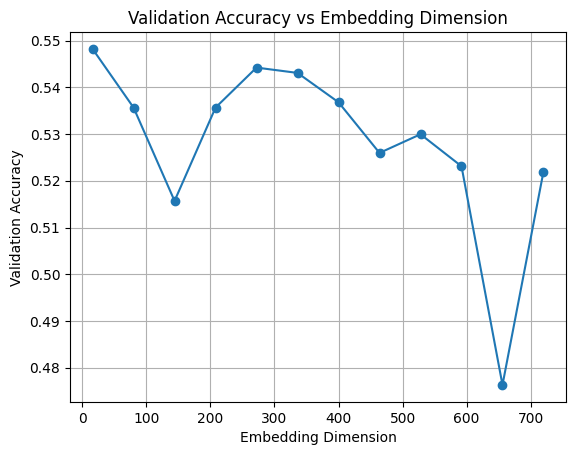

In [178]:
# Import the classifier
import torch
import torch.nn as nn
import torch.nn.functional as F



class AudioCNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(AudioCNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.relu = nn.ReLU()
        dummy_input = torch.zeros(1, 1, input_dim)
        self.flattened_size = self._get_flattened_size(dummy_input)
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def _get_flattened_size(self, dummy_input):
        x = self.relu(self.bn1(self.conv1(dummy_input)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        return x.view(1, -1).size(1)


log_folder = r"C:\Users\Conite.GBODOGBE\Downloads\MER\logs"
logger, log_file = setup_logger(log_folder, dim=768)
pipeline = EmbeddingPipeline(logger, classifier_class=AudioCNNClassifier)

normalized_audio_embeddings = pipeline.normalize_embeddings(audio_features.values)

top_labels = final_dataframe['emotion'].value_counts().head(4).index.tolist()
results = pipeline.test_dimensions(
    embeddings=normalized_audio_embeddings,
    labels=final_dataframe['emotion'],
    top_labels=top_labels,
    min_dim=16,
    max_dim=768,
    step=64,
    batch_size=32,
    epochs=10
)

import matplotlib.pyplot as plt
plt.plot(results["dimension"], results["val_accuracy"], marker="o")
plt.xlabel("Embedding Dimension")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Embedding Dimension")
plt.grid()
plt.show()


**Reduce_dimensions** 

In [186]:
def reduce_dimensions(self, embeddings, target_dim):
    pca = PCA(n_components=target_dim)
    reduced_embeddings = pca.fit_transform(embeddings)
    self.logger.info(f"PCA applied: Reduced embeddings to {target_dim} dimensions.")
    return reduced_embeddings

final_audio_embeddings = pipeline.reduce_dimensions(normalized_audio_embeddings, target_dim=100)

train_dataset, val_dataset = pipeline.prepare_data(final_audio_embeddings, final_dataframe['emotion'], top_labels)
input_dim = final_audio_embeddings.shape[1]
audio_model, val_acc = pipeline.train_model(train_dataset, val_dataset, input_dim=input_dim, num_classes=len(top_labels), epochs=10)


In [189]:
val_acc

0.5453508271534512

**3.1 LSTM Classifier for Text**

In [ ]:
def train_text_classifier(text_embeddings, labels, input_dim, hidden_dim, num_classes, batch_size=32, epochs=10):
    import torch
    from torch.utils.data import DataLoader, TensorDataset
    import torch.nn as nn
    import torch.optim as optim

    class TextLSTMClassifier(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_classes, num_layers=1):
            super(TextLSTMClassifier, self).__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, num_classes)

        def forward(self, x):
            _, (hidden, _) = self.lstm(x)
            return self.fc(hidden[-1])

    dataset = TensorDataset(
        torch.tensor(text_embeddings, dtype=torch.float32).unsqueeze(1),
        torch.tensor(labels, dtype=torch.long)
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = TextLSTMClassifier(input_dim, hidden_dim, num_classes).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(dataloader)}")

    return model


In [ ]:
text_model = train_text_classifier(
    text_embeddings,  
    labels_train,          
    input_dim=768,  
    hidden_dim=128,  
    num_classes=len(label_encoder_train.classes_), 
    batch_size=32,   
    epochs=150       
)

In [ ]:
def train_video_classifier(video_embeddings, labels, input_dim, num_classes, batch_size=32, epochs=10):

    import torch
    from torch.utils.data import DataLoader, TensorDataset
    import torch.nn as nn
    import torch.optim as optim

    class VideoClassifier(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(VideoClassifier, self).__init__()
            self.fc1 = nn.Linear(input_dim, 128)
            self.fc2 = nn.Linear(128, num_classes)
            self.relu = nn.ReLU()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    dataset = TensorDataset(
        torch.tensor(video_embeddings, dtype=torch.float32),
        torch.tensor(labels, dtype=torch.long)
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = VideoClassifier(input_dim, num_classes).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(dataloader)}")

    return model


In [ ]:
video_model = train_video_classifier(
    video_embeddings, 
    labels_train,           
    input_dim=768,    
    num_classes=len(label_encoder_train.classes_), 
    batch_size=32,  
    epochs=150  
)

In [ ]:
audio_model.eval()
text_model.eval()
video_model.eval()

In [ ]:
# print(f"Dev Audio Embeddings Shape: {dev_audio_embeddings.shape}")
# print(f"Dev Text Embeddings Shape: {dev_text_embeddings.shape}")
# print(f"Dev Video Embeddings Shape: {dev_video_embeddings.shape}")


In [ ]:
import ast


dev_text_embeddings = pd.read_csv('../working/dev_embeddings.csv')['text_embedding']
dev_audio_embeddings = pd.read_csv('../working/dev_embeddings.csv')['audio_embedding']
dev_video_embeddings = pd.read_csv('../working/dev_video_embeddings_vit.csv')['embedding']

dev_text_embeddings = dev_text_embeddings.apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

dev_audio_embeddings = dev_audio_embeddings.apply(lambda x: "[]" if isinstance(x, float) else x)
dev_audio_embeddings = dev_audio_embeddings.apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))
print(f"Number of NaN : {dev_video_embeddings.isna().sum()}")
dev_video_embeddings = dev_video_embeddings.fillna("[]")
dev_video_embeddings = dev_video_embeddings.apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) and x.strip() else np.array([]))

# ---------------------------------------------------------------------------------------------------------------------------------------------------
print(type(dev_text_embeddings[0]))
print(type(dev_audio_embeddings[0]))
print(type(dev_video_embeddings[0]))

dev_audio_embeddings = dev_audio_embeddings[dev_audio_embeddings.apply(lambda x : isinstance(x, np.ndarray) and x.shape == (768,))]
dev_text_embeddings = dev_text_embeddings[dev_text_embeddings.apply(lambda x: isinstance(x, np.ndarray) and x.shape == (768,))]
dev_video_embeddings = dev_video_embeddings[dev_video_embeddings.apply(lambda x: isinstance(x, np.ndarray) and x.shape == (768,))]

# ---------------------------------------------------------------------------------------------------------------------------------------------------
def pad_or_truncate(embedding, target_length=768):
    if len(embedding) > target_length:
        return embedding[:target_length]  
    elif len(embedding) < target_length:
        return np.pad(embedding, (0, target_length - len(embedding))) 
    return embedding

dev_audio_embeddings = dev_audio_embeddings.apply(lambda x: pad_or_truncate(x))
dev_text_embeddings = dev_text_embeddings.apply(lambda x: pad_or_truncate(x))
dev_video_embeddings = dev_video_embeddings.apply(lambda x: pad_or_truncate(x))

# ---------------------------------------------------------------------------------------------------------------------------------------------------
dev_labels = pd.read_csv('../working/dev_embeddings.csv')['emotion']
print(dev_labels.head())

from sklearn.preprocessing import LabelEncoder

label_encoder_dev = LabelEncoder()
dev_labels = label_encoder_dev.fit_transform(dev_labels)

dev_labels = np.array(dev_labels)

print("Class mapping:", dict(zip(label_encoder_dev.classes_, range(len(label_encoder_dev.classes_)))))



In [ ]:
dev_audio_embeddings

In [ ]:
import numpy as np
from scipy.stats import mode

def ensemble_voting(audio_model, text_model, video_model, X_audio, X_text, X_video):
    audio_preds = audio_model(torch.tensor(X_audio, dtype=torch.float32)).argmax(dim=1).numpy()
    text_preds = text_model(torch.tensor(X_text, dtype=torch.float32)).argmax(dim=1).numpy()
    video_preds = video_model(torch.tensor(X_video, dtype=torch.float32)).argmax(dim=1).numpy()

    all_preds = np.stack([audio_preds, text_preds, video_preds], axis=0)
    final_preds = mode(all_preds, axis=0)[0].flatten()  
    return final_preds


5. Evaluate the Ensemble

In [ ]:
print(f"Dev audio embeddings shape: {dev_audio_embeddings.shape}")
print(f"Dev text embeddings shape: {dev_text_embeddings.shape}")
print(f"Dev video embeddings shape: {dev_video_embeddings.shape}")

In [ ]:
X_text = dev_text_embeddings
X_audio = dev_audio_embeddings
X_video = dev_video_embeddings
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
audio_model = audio_model.to(device) 
X_audio_tensor = torch.tensor(dev_audio_embeddings, dtype=torch.float32).to(device)

# Make predictions
with torch.no_grad():
    audio_preds = audio_model(X_audio_tensor).argmax(dim=1).cpu().numpy()

print(f"Audio Predictions: {audio_preds[:10]}")


In [ ]:
# Ensure the text model is on the correct device
text_model = text_model.to(device)

# Prepare the input tensor
X_text_tensor = torch.tensor(dev_text_embeddings, dtype=torch.float32).unsqueeze(1).to(device)

# Make predictions
with torch.no_grad():
    text_preds = text_model(X_text_tensor).argmax(dim=1).cpu().numpy()

print(f"Text Predictions: {text_preds[:10]}")


In [ ]:
# Ensure the video model is on the correct device
video_model = video_model.to(device)

# Prepare the input tensor
X_video_tensor = torch.tensor(dev_video_embeddings, dtype=torch.float32).to(device)

# Make predictions
with torch.no_grad():
    video_preds = video_model(X_video_tensor).argmax(dim=1).cpu().numpy()

print(f"Video Predictions: {video_preds[:10]}")


In [ ]:
import numpy as np
from scipy.stats import mode

def flexible_voting(audio_preds=None, text_preds=None, video_preds=None):
    """
    Perform majority voting across modalities if all are present.
    If only one modality is present, use its predictions directly.

    Args:
        audio_preds (numpy.ndarray, optional): Predictions from the audio model.
        text_preds (numpy.ndarray, optional): Predictions from the text model.
        video_preds (numpy.ndarray, optional): Predictions from the video model.

    Returns:
        numpy.ndarray: Final predictions after voting or from the single available modality.
    """
    preds = []
    if audio_preds is not None:
        preds.append(audio_preds)
    if text_preds is not None:
        preds.append(text_preds)
    if video_preds is not None:
        preds.append(video_preds)

    # If only one modality is available, return its predictions
    if len(preds) == 1:
        return preds[0]
    
    # Perform majority voting if multiple modalities are available
    all_preds = np.stack(preds, axis=0)
    final_preds = mode(all_preds, axis=0)[0].flatten()  # Majority vote
    return final_preds


In [ ]:
# Find the minimum number of samples across modalities
min_samples = min(len(dev_audio_embeddings), len(dev_text_embeddings), len(dev_video_embeddings))

# Trim each modality to the same number of samples
dev_audio_embeddings = dev_audio_embeddings[:min_samples]
dev_text_embeddings = dev_text_embeddings[:min_samples]
dev_video_embeddings = dev_video_embeddings[:min_samples]
dev_labels = dev_labels[:min_samples]  # Ensure labels are aligned


In [ ]:
# Ensure models are in evaluation mode
audio_model.eval()
text_model.eval()
video_model.eval()

# Audio predictions
with torch.no_grad():
    X_audio_tensor = torch.tensor(dev_audio_embeddings, dtype=torch.float32).to("cuda" if torch.cuda.is_available() else "cpu")
    audio_preds = audio_model(X_audio_tensor).argmax(dim=1).cpu().numpy()

# Text predictions
with torch.no_grad():
    X_text_tensor = torch.tensor(dev_text_embeddings, dtype=torch.float32).unsqueeze(1).to("cuda" if torch.cuda.is_available() else "cpu")
    text_preds = text_model(X_text_tensor).argmax(dim=1).cpu().numpy()

# Video predictions
with torch.no_grad():
    X_video_tensor = torch.tensor(dev_video_embeddings, dtype=torch.float32).to("cuda" if torch.cuda.is_available() else "cpu")
    video_preds = video_model(X_video_tensor).argmax(dim=1).cpu().numpy()


In [ ]:
# Perform flexible voting
final_preds = flexible_voting(audio_preds=audio_preds, text_preds=text_preds, video_preds=video_preds)

# Evaluate predictions
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(dev_labels, final_preds)
print(f"Ensemble Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(dev_labels, final_preds))


In [ ]:
import numpy as np
from scipy.stats import mode

def flexible_voting(audio_preds=None, text_preds=None, video_preds=None):
    """
    Perform majority voting across modalities if all are present.
    If only one modality is present, use its predictions directly.

    Args:
        audio_preds (numpy.ndarray, optional): Predictions from the audio model.
        text_preds (numpy.ndarray, optional): Predictions from the text model.
        video_preds (numpy.ndarray, optional): Predictions from the video model.

    Returns:
        numpy.ndarray: Final predictions after voting or from the single available modality.
    """
    preds = []
    if audio_preds is not None:
        preds.append(audio_preds)
    if text_preds is not None:
        preds.append(text_preds)
    if video_preds is not None:
        preds.append(video_preds)

    # If only one modality is available, return its predictions
    if len(preds) == 1:
        return preds[0]
    
    # Perform majority voting if multiple modalities are available
    all_preds = np.stack(preds, axis=0)
    final_preds = mode(all_preds, axis=0)[0].flatten()  # Majority vote
    return final_preds


# Find the minimum number of samples across modalities
min_samples = min(len(dev_audio_embeddings), len(dev_text_embeddings), len(dev_video_embeddings))

# Trim each modality to the same number of samples
dev_audio_embeddings = dev_audio_embeddings[:min_samples]
dev_text_embeddings = dev_text_embeddings[:min_samples]
dev_video_embeddings = dev_video_embeddings[:min_samples]
dev_labels = dev_labels[:min_samples]  # Ensure labels are aligned


# Ensure models are in evaluation mode
audio_model.eval()
text_model.eval()
video_model.eval()

# Audio predictions
with torch.no_grad():
    X_audio_tensor = torch.tensor(dev_audio_embeddings, dtype=torch.float32).to("cuda" if torch.cuda.is_available() else "cpu")
    audio_preds = audio_model(X_audio_tensor).argmax(dim=1).cpu().numpy()

# Text predictions
with torch.no_grad():
    X_text_tensor = torch.tensor(dev_text_embeddings, dtype=torch.float32).unsqueeze(1).to("cuda" if torch.cuda.is_available() else "cpu")
    text_preds = text_model(X_text_tensor).argmax(dim=1).cpu().numpy()

# Video predictions
with torch.no_grad():
    X_video_tensor = torch.tensor(dev_video_embeddings, dtype=torch.float32).to("cuda" if torch.cuda.is_available() else "cpu")
    video_preds = video_model(X_video_tensor).argmax(dim=1).cpu().numpy()

    


In [ ]:
# Perform flexible voting
final_preds = flexible_voting(audio_preds=audio_preds, text_preds=text_preds, video_preds=video_preds)

# Evaluate predictions
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(dev_labels, final_preds)
print(f"Ensemble Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(dev_labels, final_preds))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Compute accuracy for audio predictions
audio_accuracy = accuracy_score(dev_labels, audio_preds)
print(f"Audio Accuracy: {audio_accuracy}")

# Detailed classification report
print("Audio Classification Report:\n", classification_report(dev_labels, audio_preds))


In [ ]:
# Compute accuracy for text predictions
text_accuracy = accuracy_score(dev_labels, text_preds)
print(f"Text Accuracy: {text_accuracy}")

# Detailed classification report
print("Text Classification Report:\n", classification_report(dev_labels, text_preds))


In [ ]:
video_accuracy = accuracy_score(dev_labels, video_preds)
print(f"Video Accuracy: {video_accuracy}")

# Detailed classification report
print("Video Classification Report:\n", classification_report(dev_labels, video_preds))


## **Next Step**

In [1]:
import pandas as pd

final_dataframe = pd.read_csv('../outputs/preprocessed/embedding_v1/concatenated_train_embeddings.csv')
text_embeddings = pd.read_csv('../outputs/preprocessed/embedding_v1/text_exp_embedding_features.csv')
audio_embeddings = pd.read_csv('../outputs/preprocessed/embedding_v1/audio_exp_embedding_features.csv')
video_embeddings = pd.read_csv('../outputs/preprocessed/embedding_v1/video_exp_embedding_features.csv')
train_df = pd.read_csv('../outputs/preprocessed/embedding_v1/meld_train_data_updated.csv')

In [3]:
audio_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.093914,0.076241,0.068882,0.181334,0.328460,-0.290516,0.233741,-0.265551,0.064729,-0.087522,...,-0.207746,0.136935,0.004562,0.079207,-0.540750,0.015910,-0.194369,0.246880,0.343913,-0.368910
1,-0.028174,0.072124,0.438519,0.021849,-0.276202,-0.121273,0.198343,-0.073642,-0.004926,-0.095020,...,0.398234,0.182521,-0.161446,-0.039307,-0.226637,-0.205345,0.035520,0.435332,0.099466,-0.029616
2,-0.072145,0.115909,0.176923,-0.007852,-0.175530,-0.121004,0.140612,-0.034857,0.002250,-0.140909,...,0.122414,0.152680,-0.233528,0.025625,-0.309576,-0.138481,0.066248,0.483304,0.071498,0.042115
3,0.049622,0.180436,-0.111291,0.282972,0.389075,-0.247504,0.172295,-0.302049,-0.002914,-0.111460,...,0.107485,0.125487,-0.180655,-0.002911,-0.299319,0.002558,-0.209065,0.183400,0.348653,-0.086361
4,0.227716,-0.224345,0.274166,0.282386,0.029785,-0.455142,0.206925,-0.292568,-0.081559,-0.100508,...,-0.012022,0.109497,0.215372,-0.251192,-0.336090,-0.042007,0.021523,0.360756,0.226124,0.221122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,-0.094446,0.036117,0.219462,-0.057723,-0.423986,-0.191391,0.350825,0.041785,0.047811,-0.238141,...,0.124590,0.175634,-0.052399,-0.098509,-0.159883,-0.137993,0.159950,0.293182,0.029826,0.092199
9985,0.094711,0.299668,-0.164276,0.267755,0.438612,-0.262925,0.145737,-0.312559,0.010825,-0.146049,...,0.132662,0.131023,-0.188512,0.012998,-0.163355,-0.095271,-0.138093,0.228563,0.372877,-0.224825
9986,0.086498,0.281628,-0.207967,0.263898,0.334710,-0.199176,0.239560,-0.256236,-0.031796,-0.026789,...,0.149956,0.111496,-0.109235,-0.154657,-0.257476,-0.020842,-0.180603,0.175232,0.294258,-0.073407
9987,0.191212,0.055322,0.098573,-0.048649,-0.206716,-0.043905,0.062533,-0.046444,-0.220474,-0.188059,...,-0.062878,0.163260,0.046449,-0.304296,0.007071,-0.165805,-0.028162,0.337804,0.158753,-0.121844


In [4]:
train_df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,mp4_directory
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4.wav,/kaggle/input/meld-multimodal-emotionlines-dat...


**1 Align modality**

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
audio_embeddings = scaler.fit_transform(audio_embeddings)
text_embeddings = scaler.fit_transform(text_embeddings)
video_embeddings = scaler.fit_transform(video_embeddings)

combined_embeddings = np.concatenate(
    [audio_embeddings, text_embeddings, video_embeddings], axis=1
)


In [6]:
audio_embeddings.shape, text_embeddings.shape, video_embeddings.shape, combined_embeddings.shape

((9989, 768), (9989, 768), (9989, 768), (9989, 2304))

**2 Temporal processing**

In [7]:
import pandas as pd

window_size = 3

def create_temporal_windows(data, embeddings, window_size):
    import numpy as np

    embeddings = np.array(embeddings)
    embedding_dim = embeddings.shape[1]
    sequences = []

    for i in range(len(data)):
        window = np.zeros((2 * window_size + 1, embedding_dim))
        start_idx = max(i - window_size, 0)
        end_idx = min(i + window_size + 1, len(data))
        window_start = max(window_size - i, 0)
        window_end = window_start + (end_idx - start_idx)
        
        window[window_start:window_end] = embeddings[start_idx:end_idx]
        sequences.append(window.flatten())
    return np.array(sequences)


temporal_audio = create_temporal_windows(train_df, audio_embeddings, window_size)
temporal_text = create_temporal_windows(train_df, text_embeddings, window_size)
temporal_video = create_temporal_windows(train_df, video_embeddings, window_size)


In [17]:
print(temporal_audio.shape)
print(temporal_text.shape)
print(temporal_video.shape)


(9989, 5376)
(9989, 5376)
(9989, 5376)


In [18]:
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

labels = train_df['Emotion'].values
labels_map = { label: i for i, label in enumerate(np.unique(labels)) }
numeric_labels = np.array([labels_map[label] for label in labels])

**Concatenation of modalities**

In [19]:
combined_embeddings = np.concatenate(
    [temporal_audio, temporal_text, temporal_video], axis=1
)
print(combined_embeddings.shape)
    

(9989, 16128)


**Implement BiGRUWithAttention**

In [54]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import numpy as np

class BiGRUWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, dropout_rate=0.2):
        super(BiGRUWithAttention, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attention = nn.MultiheadAttention(embed_dim=2 * hidden_dim, num_heads=8, batch_first=True)
        self.layer_norm = nn.LayerNorm(2 * hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        gru_output, _ = self.gru(x)
        attn_output, _ = self.attention(gru_output, gru_output, gru_output)
        x = self.layer_norm(attn_output + gru_output)
        x = self.dropout(x)
        return x

class CoAttentionFusion(nn.Module):
    def __init__(self, input_dim_audio, input_dim_text, input_dim_video, num_classes, hidden_dim=64, dropout_rate=0.2):
        super(CoAttentionFusion, self).__init__()
        self.audio_projection = nn.Linear(input_dim_audio, 256)
        self.text_projection = nn.Linear(input_dim_text, 256)
        self.video_projection = nn.Linear(input_dim_video, 256)

        self.audio_attention = BiGRUWithAttention(input_dim=256, hidden_dim=hidden_dim, dropout_rate=dropout_rate)
        self.text_attention = BiGRUWithAttention(input_dim=256, hidden_dim=hidden_dim, dropout_rate=dropout_rate)
        self.video_attention = BiGRUWithAttention(input_dim=256, hidden_dim=hidden_dim, dropout_rate=dropout_rate)

        self.co_attention = nn.MultiheadAttention(embed_dim=384, num_heads=8, batch_first=True)
        self.layer_norm = nn.LayerNorm(384)

        self.fc = nn.Sequential(
            nn.Linear(384, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, num_classes)
        )

    def forward(self, audio, text, video):
        # Projections
        audio_feat = self.audio_projection(audio)  # (batch_size, input_dim_audio, 256)
        text_feat = self.text_projection(text)    # (batch_size, input_dim_text, 256)
        video_feat = self.video_projection(video)  # (batch_size, input_dim_video, 256)

        # Bi-GRU with Attention
        audio_feat = self.audio_attention(audio_feat.unsqueeze(1))  # (batch_size, 1, 128)
        text_feat = self.text_attention(text_feat.unsqueeze(1))    # (batch_size, 1, 128)
        video_feat = self.video_attention(video_feat.unsqueeze(1))  # (batch_size, 1, 128)


        # Combine features
        combined = torch.cat([audio_feat, text_feat, video_feat], dim=2)  # (batch_size, 1, 384)

        # Co-Attention
        attn_output, _ = self.co_attention(combined, combined, combined)  # (batch_size, 1, 384)
        x = self.layer_norm(attn_output + combined)  # (batch_size, 1, 384)

        # Classification
        x = x.squeeze(1)  # Remove sequence length dimension (batch_size, 384)
        return self.fc(x)  # (batch_size, num_classes)

# Example Data
batch_size = 32
input_dim_audio = 768
input_dim_text = 768
input_dim_video = 768
num_classes = 7


audio_embeddings = torch.tensor(audio_embeddings, dtype=torch.float32)
text_embeddings = torch.tensor(text_embeddings, dtype=torch.float32)
video_embeddings = torch.tensor(video_embeddings, dtype=torch.float32)

labels = torch.randint(0, num_classes, (9989,))

# Create Dataset and DataLoader
dataset = TensorDataset(audio_embeddings, text_embeddings, video_embeddings, labels)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model
model = CoAttentionFusion(input_dim_audio=input_dim_audio, input_dim_text=input_dim_text, input_dim_video=input_dim_video, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for audio_batch, text_batch, video_batch, labels_batch in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(audio_batch, text_batch, video_batch)

        # Compute loss
        loss = criterion(outputs, labels_batch)
        running_loss += loss.item()

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")




/tmp/ipykernel_5950/2075553502.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio_embeddings = torch.tensor(audio_embeddings, dtype=torch.float32)
/tmp/ipykernel_5950/2075553502.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embeddings = torch.tensor(text_embeddings, dtype=torch.float32)
/tmp/ipykernel_5950/2075553502.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  video_embeddings = torch.tensor(video_embeddings, dtype=torch.float32)


Epoch [1/10], Loss: 1.9672
Epoch [2/10], Loss: 1.9326
Epoch [3/10], Loss: 1.8714
Epoch [4/10], Loss: 1.6821
Epoch [5/10], Loss: 1.3107
Epoch [6/10], Loss: 0.8525
Epoch [7/10], Loss: 0.5078
Epoch [8/10], Loss: 0.3870
Epoch [9/10], Loss: 0.2576
Epoch [10/10], Loss: 0.2081


In [2]:
test_df = pd.read_csv('../outputs/preprocessed/embedding_v1/meld_test_data_updated.csv')
test_df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,mp4_directory
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",dia0_utt0.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",dia0_utt1.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",dia0_utt2.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",dia1_utt0.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",dia1_utt1.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,"00:14:35,457","00:14:40,211",dia279_utt11.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,"00:14:42,256","00:14:43,840",dia279_utt12.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,"00:14:44,008","00:14:48,511",dia279_utt13.wav,/kaggle/input/meld-multimodal-emotionlines-dat...
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,"00:14:48,138","00:14:52,390",dia279_utt14.wav,/kaggle/input/meld-multimodal-emotionlines-dat...


In [3]:
test_df.value_counts()

Sr No.  Utterance                                                                                                    Speaker  Emotion   Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  StartTime     EndTime       filename          mp4_directory                                                                                                         
1       Why do all youre coffee mugs have numbers on the bottom?                                                    Mark     surprise  positive   0            0             3       19       00:14:38,127  00:14:40,378  dia0_utt0.wav     /kaggle/input/meld-multimodal-emotionlines-dataset/MELD.Raw/MELD.Raw/test/output_repeated_splits_test/dia0_utt0.mp4       1
1837    I guess.                                                                                                     Monica   neutral   neutral    184          13            8       14       00:15:22,280  00:15:26,320  dia184_utt13.wav  /kaggle/input/meld-multimodal-emotionlines-dat

In [4]:
import os

def calculate_size(path):
    """
    Calculate the size of a file or directory.
    """
    if os.path.isfile(path):
        return os.path.getsize(path)
    else:
        total_size = 0
        for dirpath, _, filenames in os.walk(path):
            for f in filenames:
                fp = os.path.join(dirpath, f)
                if os.path.isfile(fp):
                    total_size += os.path.getsize(fp)
        return total_size

def list_directory_sizes(directory):
    """
    List sizes of files and directories in a specified path.
    """
    items = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        item_size = calculate_size(item_path)
        items.append({"Name": item, "Size (MB)": item_size / (1024 * 1024)})

    # Sort by size in descending order
    items.sort(key=lambda x: x["Size (MB)"], reverse=True)
    return items

def main():
    directory = "/home/conite/Documents/COURS_UM6P/S3/AUTOMATIC-SPEECH-RECOGNITION/S3-PROJECT/Multimodal_Emotion_Recognition"
    
    if not os.path.exists(directory):
        print(f"Error: Directory '{directory}' does not exist.")
        return
    
    sizes = list_directory_sizes(directory)
    
    print(f"{'Name':<50}{'Size (MB)':>10}")
    print("-" * 60)
    for item in sizes:
        print(f"{item['Name']:<50}{item['Size (MB)']:>10.2f}")

if __name__ == "__main__":
    main()

Name                                               Size (MB)
------------------------------------------------------------
.git                                                  288.79
outputs                                                 6.23
notebooks                                               3.17
preprocessing                                           0.03
pipelines                                               0.02
utils                                                   0.01
models                                                  0.00
main.py                                                 0.00
.vscode                                                 0.00
requirements.txt                                        0.00
.gitignore                                              0.00
README.md                                               0.00
working                                                 0.00
logs                                                    0.00


In [2]:
!pip install torch torchvision torchaudio

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB 1.4 MB/s eta 0:02:29
   ---------------------------------------- 0.1/203.0 MB 2.1 MB/s eta 0:01:35
   ---------------------------------------- 0.4/203.0 MB 3.8 MB/s eta 0:00:54
   ---------------------------------------- 0.8/203.0 MB 5.2 MB/s eta 0:00:39
   ---------------------------------------- 1.1/203.0 MB 5.2 MB/s eta 0:00:39
   ---------------------------------------- 1.6/203.0 MB 6.9 MB/s eta 0:00:30
   ---------------------------------------- 2.3/203.0 MB 7.6 MB/s eta 0:00:27
    --------------------------------------- 2.9/203.0 MB 8.3 MB/s eta 0:00:25
    --------------------------------------- 3.3/

In [11]:
%%file test.py
# verify gpu is available
import torch
print("GPU is available : ", torch.cuda.is_available())    
print("GPU is available : ", torch.cuda.get_device_name(0))

Overwriting test.py
